In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , roc_curve , roc_auc_score

### Importing the cleaned datafile 

In [3]:
df = pd.read_csv("students.df.cleaned.csv")

In [4]:
df.head()

,Unnamed: 0,Marital.status,Application.mode,Application.order,Course,Daytime.evening.attendance,Previous.qualification,Nationality,Mother.s.qualification,Father.s.qualification,...,Curricular.units.2nd.sem..credited.,Curricular.units.2nd.sem..enrolled.,Curricular.units.2nd.sem..evaluations.,Curricular.units.2nd.sem..approved.,Curricular.units.2nd.sem..grade.,Curricular.units.2nd.sem..without.evaluations.,Unemployment.rate,Inflation.rate,GDP,Target
0,1,1,8,5,2,1,1,1,13,-1,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,2,1,-1,1,11,1,1,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,3,1,1,5,5,1,1,1,22,27,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,4,1,8,2,15,1,1,1,23,27,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,5,2,12,1,3,0,1,1,22,28,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [5]:
df.tail()

,Unnamed: 0,Marital.status,Application.mode,Application.order,Course,Daytime.evening.attendance,Previous.qualification,Nationality,Mother.s.qualification,Father.s.qualification,...,Curricular.units.2nd.sem..credited.,Curricular.units.2nd.sem..enrolled.,Curricular.units.2nd.sem..evaluations.,Curricular.units.2nd.sem..approved.,Curricular.units.2nd.sem..grade.,Curricular.units.2nd.sem..without.evaluations.,Unemployment.rate,Inflation.rate,GDP,Target
3625,4420,1,1,-1,15,1,1,1,1,1,...,0,6,8,5,12.66667,0,15.5,2.8,-4.06,1
3626,4421,1,1,2,15,1,1,-1,1,1,...,0,6,6,2,11.00000,0,11.1,0.6,2.02,0
3627,4422,1,1,1,12,1,1,1,22,27,...,0,8,9,1,13.50000,0,13.9,-0.3,0.79,0
3628,4423,1,1,1,9,1,1,1,22,27,...,0,5,6,5,12.00000,0,9.4,-0.8,-3.12,1
3629,4424,1,-1,1,15,1,1,-1,23,27,...,0,6,6,6,13.00000,0,12.7,3.7,-1.70,1


In [6]:
df["Target"].unique()

array([0, 1], dtype=int64)

### O => Dropout 1 => Graduate

In [7]:
df.groupby('Target')['Target'].count()  

Target
0    1421
1    2209
Name: Target, dtype: int64

In [8]:
df.columns

Index(['Unnamed: 0', 'Marital.status', 'Application.mode', 'Application.order',
       'Course', 'Daytime.evening.attendance', 'Previous.qualification',
       'Nationality', 'Mother.s.qualification', 'Father.s.qualification',
       'Mother.s.occupation', 'Father.s.occupation', 'Displaced',
       'Educational.special.needs', 'Debtor', 'Tuition.fees.up.to.date',
       'Gender', 'Scholarship.holder', 'Age.at.enrollment', 'International',
       'Curricular.units.1st.sem..credited.',
       'Curricular.units.1st.sem..enrolled.',
       'Curricular.units.1st.sem..evaluations.',
       'Curricular.units.1st.sem..approved.',
       'Curricular.units.1st.sem..grade.',
       'Curricular.units.1st.sem..without.evaluations.',
       'Curricular.units.2nd.sem..credited.',
       'Curricular.units.2nd.sem..enrolled.',
       'Curricular.units.2nd.sem..evaluations.',
       'Curricular.units.2nd.sem..approved.',
       'Curricular.units.2nd.sem..grade.',
       'Curricular.units.2nd.sem..withou

In [ ]:
cat_cols = ['MaritalStatus', 'ApplicationMode', 'ApplicationOrder' ,'Course', 'DaytimeEveningAttendance' , 'PreviousQualification' , 
       'Nationality' , 'MothersQualification' , 'FathersQualification' , 'MothersOccupation' , 'FathersOccupation'  , 'Displaced' ,
        'EducationalSpecialNeeds' , 'Debtor' ,'TuitionFeesUpToDate' , 'Gender'  ,'ScholarshipHolder' ]

### Seperating Target variable from other variables

In [9]:
x = df.drop(columns ="Target",axis =1)

In [10]:
x

,Unnamed: 0,Marital.status,Application.mode,Application.order,Course,Daytime.evening.attendance,Previous.qualification,Nacionality,Mother.s.qualification,Father.s.qualification,...,Curricular.units.1st.sem..without.evaluations.,Curricular.units.2nd.sem..credited.,Curricular.units.2nd.sem..enrolled.,Curricular.units.2nd.sem..evaluations.,Curricular.units.2nd.sem..approved.,Curricular.units.2nd.sem..grade.,Curricular.units.2nd.sem..without.evaluations.,Unemployment.rate,Inflation.rate,GDP
0,1,1,8,5,2,1,1,1,13,10,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,2,1,6,1,11,1,1,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,3,1,1,5,5,1,1,1,22,27,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,4,1,8,2,15,1,1,1,23,27,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,5,2,12,1,3,0,1,1,22,28,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,4420,1,1,6,15,1,1,1,1,1,...,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
3626,4421,1,1,2,15,1,1,19,1,1,...,0,0,6,6,2,11.000000,0,11.1,0.6,2.02
3627,4422,1,1,1,12,1,1,1,22,27,...,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79
3628,4423,1,1,1,9,1,1,1,22,27,...,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12


In [11]:
y = df["Target"]

In [12]:
y

0       0
1       1
2       0
3       1
4       1
       ..
3625    1
3626    0
3627    0
3628    1
3629    1
Name: Target, Length: 3630, dtype: int64

### Spliting the dataset into train and test 

In [13]:
x_train , x_test , y_train, y_test = train_test_split (x , y , test_size = .20 , random_state=30) 

In [14]:
x_train

,Unnamed: 0,Marital.status,Application.mode,Application.order,Course,Daytime.evening.attendance,Previous.qualification,Nacionality,Mother.s.qualification,Father.s.qualification,...,Curricular.units.1st.sem..without.evaluations.,Curricular.units.2nd.sem..credited.,Curricular.units.2nd.sem..enrolled.,Curricular.units.2nd.sem..evaluations.,Curricular.units.2nd.sem..approved.,Curricular.units.2nd.sem..grade.,Curricular.units.2nd.sem..without.evaluations.,Unemployment.rate,Inflation.rate,GDP
1843,2231,1,1,4,2,1,1,1,1,28,...,0,0,0,0,0,0.000000,0,11.1,0.6,2.02
856,1033,1,1,1,15,1,1,1,22,27,...,0,0,6,7,6,14.142857,0,13.9,-0.3,0.79
3075,3754,1,14,4,12,1,6,1,22,27,...,0,0,7,7,6,14.850000,0,7.6,2.6,0.32
2517,3067,1,15,1,5,1,14,1,1,1,...,0,5,9,9,8,12.750000,0,16.2,0.3,-0.92
1706,2068,1,8,5,5,1,1,1,4,1,...,0,0,6,6,6,12.500000,0,15.5,2.8,-4.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,1396,1,8,1,11,1,1,1,10,1,...,0,0,6,6,6,11.333333,0,12.4,0.5,1.79
500,611,1,1,2,16,1,1,1,22,27,...,0,0,7,8,7,12.571429,0,8.9,1.4,3.51
2989,3655,1,1,1,15,1,1,1,1,14,...,0,0,6,7,6,12.166667,0,11.1,0.6,2.02
421,514,1,12,1,17,0,1,1,22,14,...,0,0,5,0,0,0.000000,0,12.7,3.7,-1.70


In [15]:
y_train

1843    1
856     1
3075    1
2517    1
1706    1
       ..
1164    1
500     1
2989    1
421     0
1829    1
Name: Target, Length: 2904, dtype: int64

### Applying Decision Tree Model

In [16]:
dt_model = DecisionTreeClassifier()

In [17]:
dt_model.fit(x_train , y_train)

DecisionTreeClassifier()

### Predicting Results on Test data set

In [18]:
dt_model.predict(x_test)

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

### Model Accuracy

In [21]:
dt_model.score(x_test , y_test)

0.8732782369146006

In [22]:
text_representation = tree.export_text(dt_model)
print(text_representation)

|--- feature_29 <= 3.50
|   |--- feature_27 <= 0.50
|   |   |--- feature_15 <= 0.50
|   |   |   |--- feature_32 <= 12.55
|   |   |   |   |--- class: 0
|   |   |   |--- feature_32 >  12.55
|   |   |   |   |--- feature_9 <= 7.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_9 >  7.50
|   |   |   |   |   |--- feature_33 <= 3.25
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_33 >  3.25
|   |   |   |   |   |   |--- feature_14 <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_14 >  0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |--- feature_15 >  0.50
|   |   |   |--- feature_18 <= 25.50
|   |   |   |   |--- feature_14 <= 0.50
|   |   |   |   |   |--- feature_33 <= 2.70
|   |   |   |   |   |   |--- feature_11 <= 3.50
|   |   |   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |   |   |--- feature_10 <= 8.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |---

### Decision Tree Model with Entropy

In [23]:
dt_entropy = DecisionTreeClassifier(criterion ="entropy" )

In [24]:
dt_entropy.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy')

In [25]:
dt_entropy.score(x_test , y_test)

0.8567493112947658

In [26]:
text_representation = tree.export_text(dt_entropy)
print(text_representation)

|--- feature_29 <= 3.50
|   |--- feature_27 <= 0.50
|   |   |--- feature_15 <= 0.50
|   |   |   |--- feature_32 <= 12.55
|   |   |   |   |--- class: 0
|   |   |   |--- feature_32 >  12.55
|   |   |   |   |--- feature_11 <= 5.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_11 >  5.00
|   |   |   |   |   |--- feature_33 <= 3.25
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_33 >  3.25
|   |   |   |   |   |   |--- feature_18 <= 18.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_18 >  18.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |--- feature_15 >  0.50
|   |   |   |--- feature_18 <= 25.50
|   |   |   |   |--- feature_34 <= 1.76
|   |   |   |   |   |--- feature_14 <= 0.50
|   |   |   |   |   |   |--- feature_0 <= 896.00
|   |   |   |   |   |   |   |--- feature_0 <= 438.50
|   |   |   |   |   |   |   |   |--- feature_11 <= 10.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   

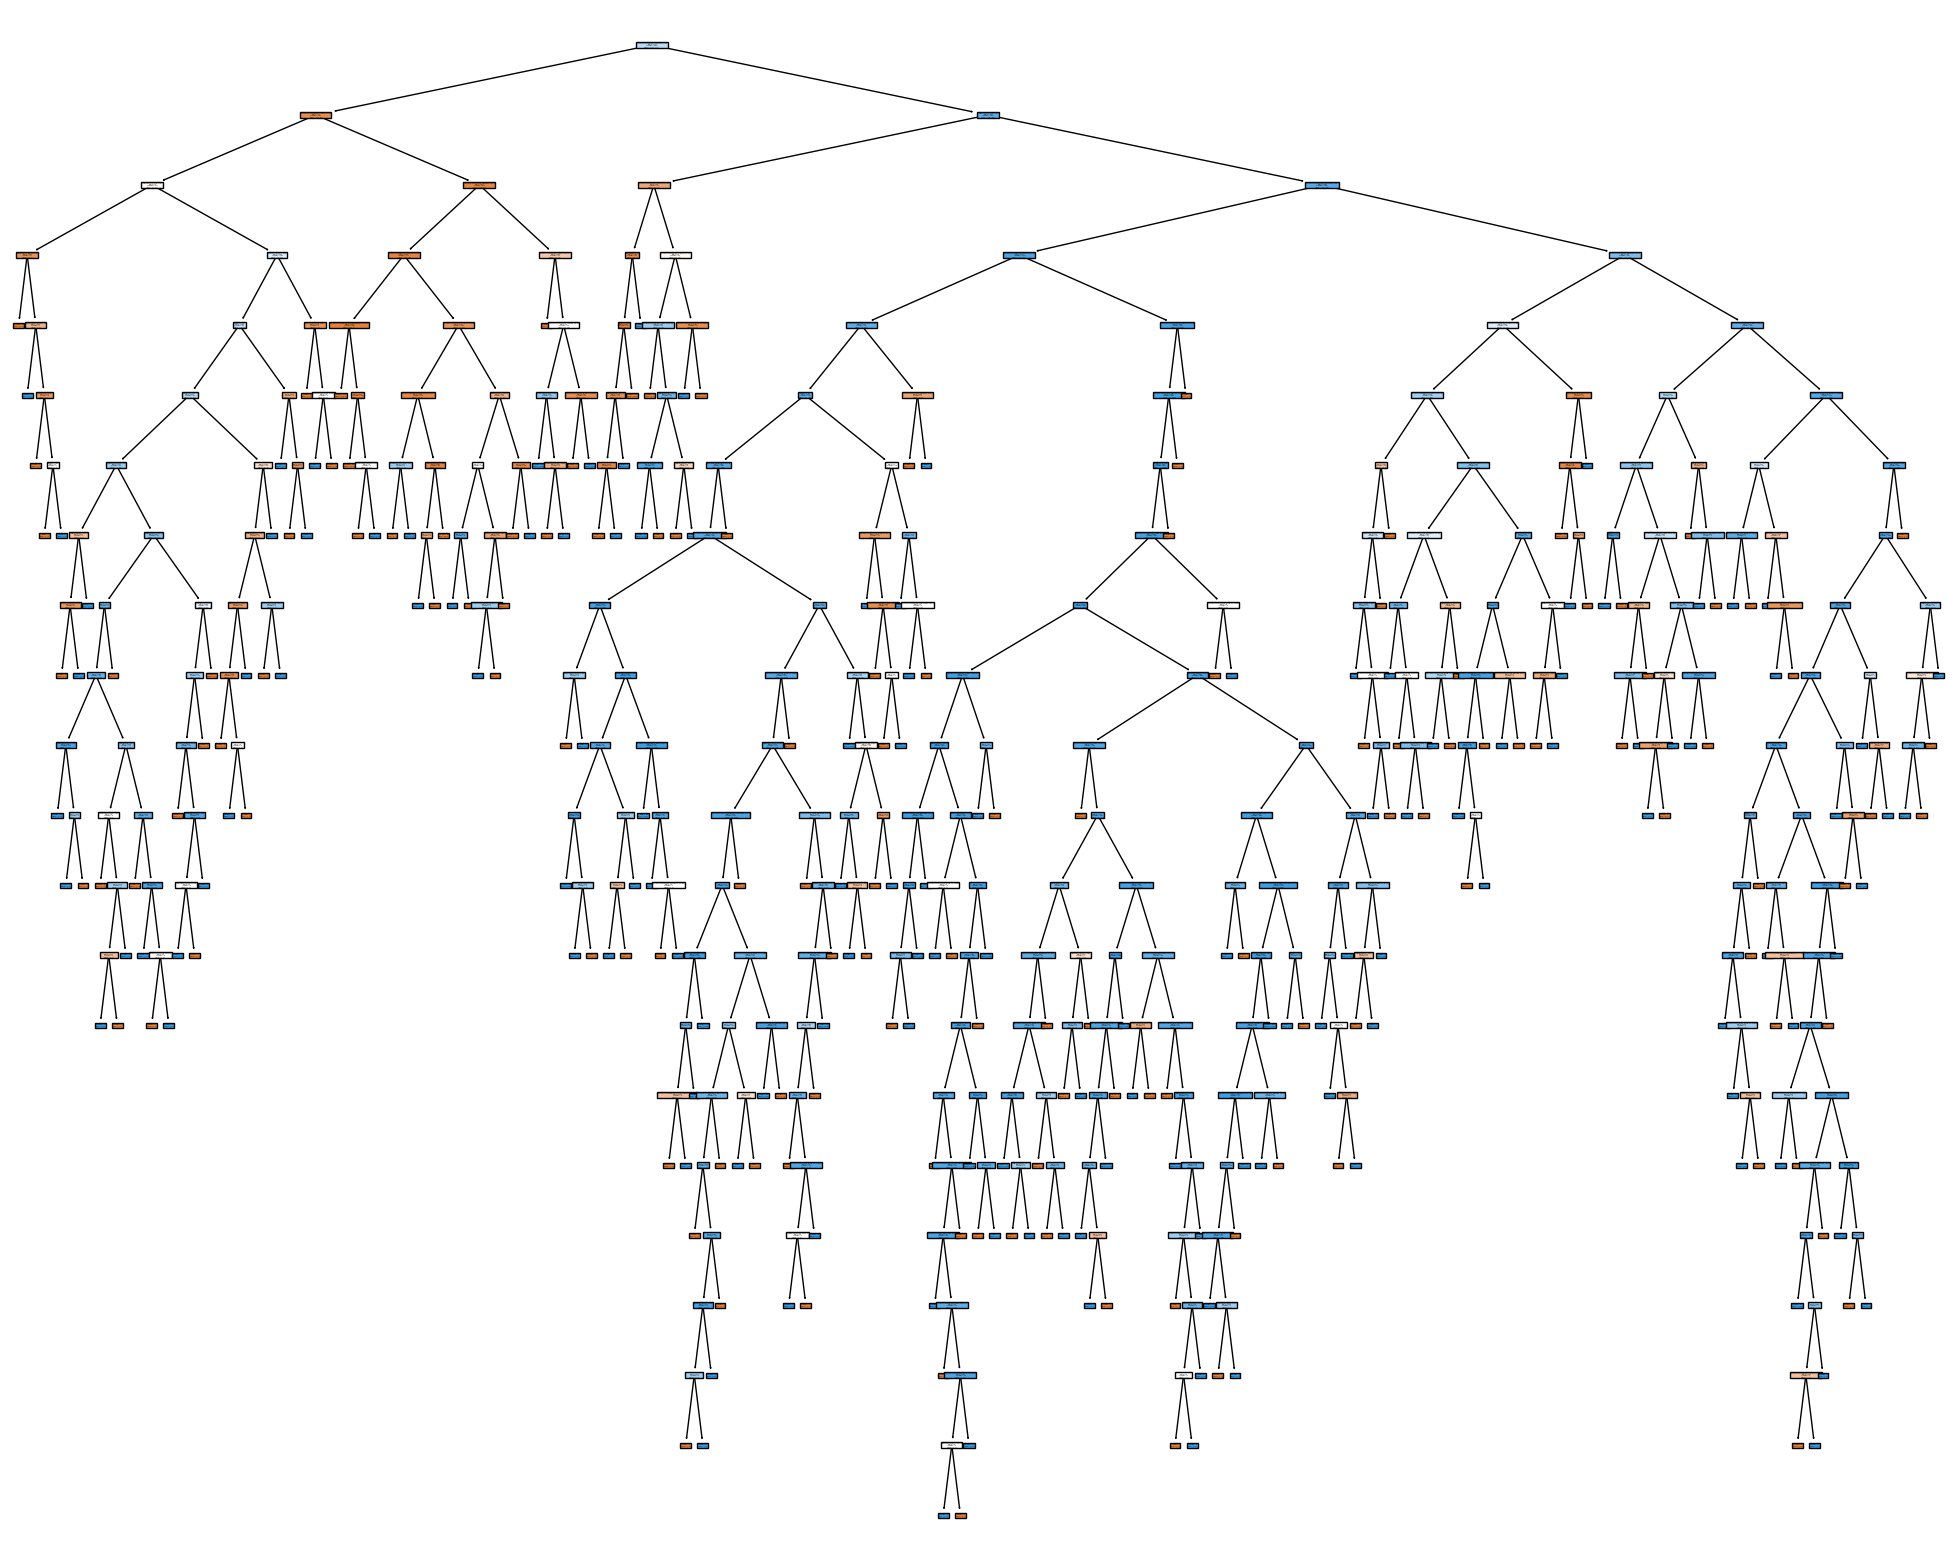

In [27]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_model, feature_names=x_train.columns, filled=True)
fig.savefig("dt_1.png")